In [1]:
# ONLY RUN THIS CELL IF YOU NEED 
# TO DOWNLOAD NLTK AND HAVE CONDA
# WATCH THE VIDEO FOR FULL INSTRUCTIONS ON THIS STEP

# Uncomment the code below and run:


# !conda install nltk #This installs nltk
# import nltk # Imports the library
# nltk.download() #Download the necessary datasets

In [1]:
import pandas as pd

In [2]:
messages=pd.read_csv("sms.csv")

In [3]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
messages['message'][30]

"Wait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us"

Let's use **groupby** to use describe by label, this way we can begin to think about the features that separate ham and spam!

In [6]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

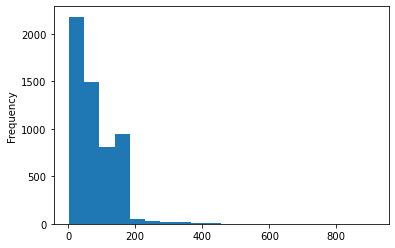

In [9]:
messages['length'].plot(bins=20, kind='hist') 

In [10]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [11]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D4FA0DF88>,
      dtype=object)

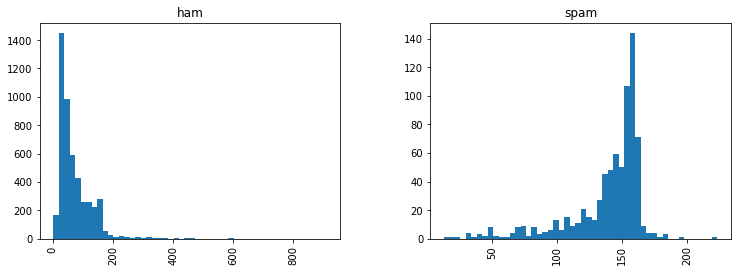

In [13]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

## Text Pre-processing

In [15]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [17]:
# [char for char in mess if char not in string.punctuation]

In [18]:
nopunc

'Sample message Notice it has punctuation'

In [19]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [21]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [22]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [24]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [25]:
# Check to make sure its working
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [26]:
# Show original dataframe
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


## Vectorization

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [29]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [30]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [31]:
bow4

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
# plt.hist(bow4.todense())

In [1]:
########################################
# plot the histogram of bow4 (plt.hist(bow4), use "toarray" if it fails
# calculate max occurances for each row (from bow of each row)



In [33]:
bow4

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [35]:
bow4.toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
bow4.toarray().max()

2

In [39]:
b4 = bow4.toarray()[0]
b4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
import numpy as np
np.where(b4 > 0)

(array([4068, 4629, 5261, 6204, 6222, 7186, 9554], dtype=int64),)

In [42]:
b4 = b4[np.where(b4 > 0)]
b4

array([2, 1, 1, 1, 1, 1, 2], dtype=int64)

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

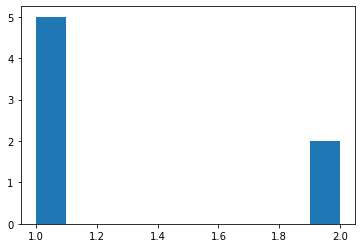

In [43]:
plt.hist(b4)

In [44]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [45]:
messages22 = messages.copy()

In [46]:
messages22['bow'] = messages['message'].apply(lambda x: bow_transformer.transform([x]))

In [47]:
messages22.head()

,label,message,length,bow
0,ham,"Go until jurong point, crazy.. Available only ...",111,"(0, 1110)\t1\n (0, 1483)\t1\n (0, 2060)\t1..."
1,ham,Ok lar... Joking wif u oni...,29,"(0, 2451)\t1\n (0, 3064)\t1\n (0, 7701)\t1..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"(0, 73)\t1\n (0, 423)\t1\n (0, 430)\t1\n ..."
3,ham,U dun say so early hor... U c already then say...,49,"(0, 4068)\t2\n (0, 4629)\t1\n (0, 5261)\t1..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"(0, 2948)\t1\n (0, 4777)\t1\n (0, 6123)\t1..."


In [48]:
messages22['bow'][3]

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [49]:
max(messages22['bow'][3].toarray()[0])

2

In [50]:
messages22['max_occur'] = messages22['bow'].apply(lambda x: x.max())
messages22.head()

,label,message,length,bow,max_occur
0,ham,"Go until jurong point, crazy.. Available only ...",111,"(0, 1110)\t1\n (0, 1483)\t1\n (0, 2060)\t1...",1
1,ham,Ok lar... Joking wif u oni...,29,"(0, 2451)\t1\n (0, 3064)\t1\n (0, 7701)\t1...",1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"(0, 73)\t1\n (0, 423)\t1\n (0, 430)\t1\n ...",2
3,ham,U dun say so early hor... U c already then say...,49,"(0, 4068)\t2\n (0, 4629)\t1\n (0, 5261)\t1...",2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"(0, 2948)\t1\n (0, 4777)\t1\n (0, 6123)\t1...",1


In [51]:
messages22.sort_values(by='max_occur').tail(4)

,label,message,length,bow,max_occur
3881,ham,Hi juan. Im coming home on fri hey. Of course ...,159,"(0, 2225)\t1\n (0, 2350)\t1\n (0, 2352)\t1...",9
4870,ham,1. Tension face 2. Smiling face 3. Waste face ...,158,"(0, 292)\t1\n (0, 423)\t1\n (0, 543)\t1\n ...",10
3017,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461,"(0, 605)\t1\n (0, 1022)\t1\n (0, 1164)\t1\...",14
1579,ham,How to Make a girl Happy? It's not at all diff...,611,"(0, 292)\t1\n (0, 423)\t1\n (0, 543)\t1\n ...",18


In [ ]:
######################

In [52]:
messages_bow = bow_transformer.transform(messages['message'])

In [53]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


##### Term Frequency
*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

#####  Inverse Document Frequency
*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*



In [54]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


We'll go ahead and check what is the IDF (inverse document frequency) of the word `"u"` and of word `"university"`?

In [56]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.2800524267409408
8.527076498901426


To transform the entire bag-of-words corpus into TF-IDF corpus at once:

In [57]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


## Training a model

In [59]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

Let's try classifying our single random message and checking how we do:

In [60]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: ham
expected: ham


In [61]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [62]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [64]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [65]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [66]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000017556E250D8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [68]:
predictions = pipeline.predict(msg_test)

In [69]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1008
        spam       0.70      1.00      0.83       107

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115

